In [130]:
## ML IE2
## Yash Athawale 121B1B013
## Aditya Agre 121B1B006
## Vedant Bijwe 121B1B024
## Dataset : https://github.com/adityaagre/Machine-Learning/blob/main/SOCIAL_MEDIA_FAKES.csv

In [131]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn import svm

# Load the dataset
data = pd.read_csv("File1.csv")

In [132]:
data

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,Isfake
0,25,1937,0,0,1,1,0,10,Yes
1,324,4122,0,0,1,0,4,15,Yes
2,15,399,0,0,0,0,3,12,Yes
3,14,107,0,1,1,0,1,10,Yes
4,264,4651,0,0,1,0,0,14,Yes
...,...,...,...,...,...,...,...,...,...
1189,239,1134,145,9,1,0,0,19,No
1190,91,149,0,7,1,0,0,18,No
1191,78,783,28,1,1,0,0,11,No
1192,135,517,44,4,1,0,4,11,No


In [133]:
## Examining Dataset

for col in data.columns:
    print(col)

userFollowerCount
userFollowingCount
userBiographyLength
userMediaCount
userHasProfilPic
userIsPrivate
usernameDigitCount
usernameLength
Isfake


In [134]:
# NUmerical Columns:

# userFollowerCount
# userFollowingCount
# userBiographyLength
# userMediaCount
# usernameDigitCount
# usernameLength

In [135]:
# Categorical Columns:

# userHasProfilPic
# userIsPrivate

In [136]:
## which of these columns have null values

no_of_col = data.shape[1]

for i in range(no_of_col):
    if(data[:i].isnull().values.any()):
        print("Col ",i," has null values.")

In [137]:
## Checking number of null entries per column.
data.isnull().sum()

userFollowerCount      0
userFollowingCount     0
userBiographyLength    0
userMediaCount         0
userHasProfilPic       0
userIsPrivate          0
usernameDigitCount     0
usernameLength         0
Isfake                 0
dtype: int64

In [138]:
## Duplicates

# We currently have 9919 rows
# Lets look at the duplicate rows now
data[data.duplicated(keep='first')]

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,Isfake
272,413,677,0,38,1,1,0,15,No
635,338,330,41,17,1,0,0,12,No
636,225,446,0,53,1,0,0,11,No
637,449,410,19,19,1,1,0,8,No
638,594,863,105,276,1,1,0,9,No
639,679,764,23,39,1,1,0,11,No
640,569,539,41,95,1,1,0,11,No
641,540,543,0,73,1,1,0,12,No
642,441,368,25,30,1,1,0,8,No
643,570,455,37,120,1,1,0,10,No


In [139]:
# Removing these rows
data.drop_duplicates(keep='first', inplace=True)
data

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,Isfake
0,25,1937,0,0,1,1,0,10,Yes
1,324,4122,0,0,1,0,4,15,Yes
2,15,399,0,0,0,0,3,12,Yes
3,14,107,0,1,1,0,1,10,Yes
4,264,4651,0,0,1,0,0,14,Yes
...,...,...,...,...,...,...,...,...,...
1189,239,1134,145,9,1,0,0,19,No
1190,91,149,0,7,1,0,0,18,No
1191,78,783,28,1,1,0,0,11,No
1192,135,517,44,4,1,0,4,11,No


In [140]:
## 29 duplicates removed

In [141]:
data.boxplot()

<Axes: >

In [142]:
## We are shuffling rows because cross validation score function does not do this by itself.
data = data.sample(frac = 1)

In [143]:
# Separate features and target variable

# Drop the 'isFake' column and rename 'Isfake' to 'target'
#data.drop(columns=['isFake'], inplace=True)
#data.rename(columns={'Isfake': 'target'})


y = data['Isfake']
X = data.drop(columns=['Isfake'])


In [144]:
## Cross Validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [145]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [146]:
## 1. KNN Model

In [147]:
## Finding the best k value using elbow method
k_list = []
acc_list = []
for i in range(1, 25, 2):

  # Making the KNN model
  k = i  # Number of neighbors
  knn_model = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn_model, X_scaled, y, cv=5)

  k_list.append(k)
  acc_list.append(score)
  print("Accuracy after considering ", k, " neighbours: ", score, np.average(score))

Accuracy after considering  1  neighbours:  [0.90128755 0.90128755 0.93133047 0.88412017 0.93991416] 0.9115879828326181
Accuracy after considering  3  neighbours:  [0.92274678 0.91416309 0.93562232 0.91845494 0.94849785] 0.9278969957081544
Accuracy after considering  5  neighbours:  [0.91845494 0.91416309 0.93133047 0.92274678 0.9527897 ] 0.9278969957081544
Accuracy after considering  7  neighbours:  [0.91845494 0.92703863 0.92274678 0.92703863 0.96137339] 0.9313304721030043
Accuracy after considering  9  neighbours:  [0.91845494 0.91416309 0.90987124 0.92703863 0.93991416] 0.9218884120171674
Accuracy after considering  11  neighbours:  [0.91416309 0.92274678 0.9055794  0.92703863 0.93562232] 0.9210300429184549
Accuracy after considering  13  neighbours:  [0.91845494 0.94420601 0.90128755 0.92274678 0.93133047] 0.9236051502145923
Accuracy after considering  15  neighbours:  [0.91416309 0.94849785 0.90128755 0.91845494 0.93133047] 0.9227467811158798
Accuracy after considering  17  neigh

In [148]:
print(k_list)
for i in acc_list:
    print(i)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[0.90128755 0.90128755 0.93133047 0.88412017 0.93991416]
[0.92274678 0.91416309 0.93562232 0.91845494 0.94849785]
[0.91845494 0.91416309 0.93133047 0.92274678 0.9527897 ]
[0.91845494 0.92703863 0.92274678 0.92703863 0.96137339]
[0.91845494 0.91416309 0.90987124 0.92703863 0.93991416]
[0.91416309 0.92274678 0.9055794  0.92703863 0.93562232]
[0.91845494 0.94420601 0.90128755 0.92274678 0.93133047]
[0.91416309 0.94849785 0.90128755 0.91845494 0.93133047]
[0.91845494 0.93991416 0.90128755 0.91416309 0.93133047]
[0.90987124 0.94420601 0.90128755 0.92274678 0.93562232]
[0.90128755 0.94420601 0.9055794  0.92274678 0.93562232]
[0.90128755 0.93562232 0.9055794  0.92703863 0.93562232]


In [149]:
## Finding average accuracy across cross validation folds

In [150]:
for i in acc_list:
    print(i)

[0.90128755 0.90128755 0.93133047 0.88412017 0.93991416]
[0.92274678 0.91416309 0.93562232 0.91845494 0.94849785]
[0.91845494 0.91416309 0.93133047 0.92274678 0.9527897 ]
[0.91845494 0.92703863 0.92274678 0.92703863 0.96137339]
[0.91845494 0.91416309 0.90987124 0.92703863 0.93991416]
[0.91416309 0.92274678 0.9055794  0.92703863 0.93562232]
[0.91845494 0.94420601 0.90128755 0.92274678 0.93133047]
[0.91416309 0.94849785 0.90128755 0.91845494 0.93133047]
[0.91845494 0.93991416 0.90128755 0.91416309 0.93133047]
[0.90987124 0.94420601 0.90128755 0.92274678 0.93562232]
[0.90128755 0.94420601 0.9055794  0.92274678 0.93562232]
[0.90128755 0.93562232 0.9055794  0.92703863 0.93562232]


In [151]:
import matplotlib.pyplot as plt
import numpy as np

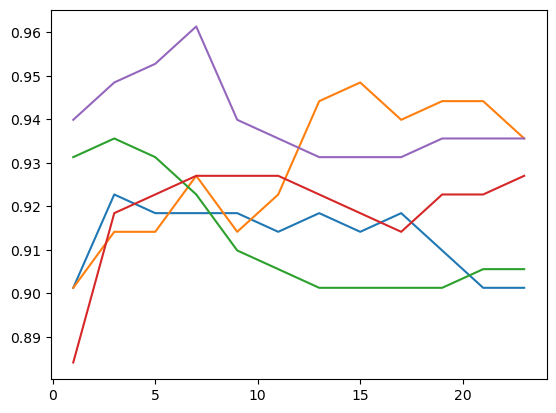

In [188]:
xpoints = np.array(k_list)
ypoints = np.array(acc_list)

plt.plot(xpoints, ypoints)
plt.show()

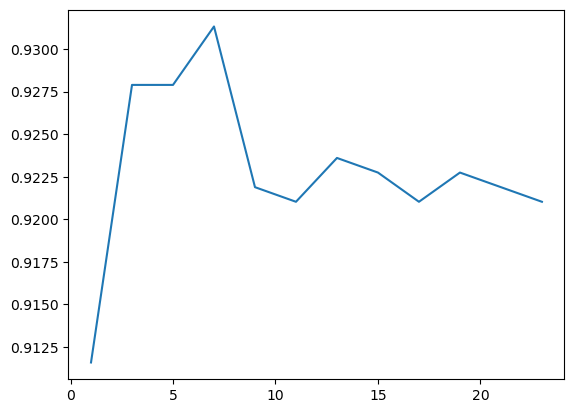

In [189]:
xpoints = np.array(k_list)
ypoints = np.array([np.average(i) for i in acc_list])
plt.plot(xpoints, ypoints)
plt.show()

In [154]:
print(xpoints)
print(ypoints)

[ 1  3  5  7  9 11 13 15 17 19 21 23]
[0.91158798 0.927897   0.927897   0.93133047 0.92188841 0.92103004
 0.92360515 0.92274678 0.92103004 0.92274678 0.92188841 0.92103004]


In [155]:
## Best accuracy at k = 3
knn_model = KNeighborsClassifier(n_neighbors=3)
score_knn_k = cross_val_score(knn_model, X_scaled, y, cv=5)
print(score_knn_k)

[0.92274678 0.91416309 0.93562232 0.91845494 0.94849785]


In [156]:
knn_avg_acc = np.average(score_knn_k)
print(knn_avg_acc)

0.9278969957081544


In [157]:
knn_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [158]:
knn_model.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [159]:
k_list_weighted = []
acc_list_weighted = []

for i in range(1, 25, 2):

  # Making the KNN model
  k = i  # Number of neighbors
  knn_model_weighted = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
  score_weighted = cross_val_score(knn_model_weighted, X_scaled, y, cv=5)

  k_list_weighted.append(k)
  acc_list_weighted.append(score_weighted)
  print("Accuracy after considering ", k, " neighbours: ", score_weighted, np.average(score_weighted))

Accuracy after considering  1  neighbours:  [0.90128755 0.90128755 0.93133047 0.88412017 0.93991416] 0.9115879828326181
Accuracy after considering  3  neighbours:  [0.92703863 0.91416309 0.93133047 0.90987124 0.9527897 ] 0.9270386266094421
Accuracy after considering  5  neighbours:  [0.91845494 0.91416309 0.93133047 0.91845494 0.94849785] 0.9261802575107296
Accuracy after considering  7  neighbours:  [0.91416309 0.91416309 0.92703863 0.92274678 0.9527897 ] 0.9261802575107296
Accuracy after considering  9  neighbours:  [0.91845494 0.91416309 0.92703863 0.92703863 0.94849785] 0.9270386266094421
Accuracy after considering  11  neighbours:  [0.91416309 0.92274678 0.91416309 0.92274678 0.94420601] 0.9236051502145923
Accuracy after considering  13  neighbours:  [0.91416309 0.93133047 0.91416309 0.92274678 0.93991416] 0.9244635193133048
Accuracy after considering  15  neighbours:  [0.91416309 0.93133047 0.90987124 0.91845494 0.93991416] 0.9227467811158798
Accuracy after considering  17  neigh

In [160]:
print(k_list_weighted)
for i in acc_list_weighted:
    print(i)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[0.90128755 0.90128755 0.93133047 0.88412017 0.93991416]
[0.92703863 0.91416309 0.93133047 0.90987124 0.9527897 ]
[0.91845494 0.91416309 0.93133047 0.91845494 0.94849785]
[0.91416309 0.91416309 0.92703863 0.92274678 0.9527897 ]
[0.91845494 0.91416309 0.92703863 0.92703863 0.94849785]
[0.91416309 0.92274678 0.91416309 0.92274678 0.94420601]
[0.91416309 0.93133047 0.91416309 0.92274678 0.93991416]
[0.91416309 0.93133047 0.90987124 0.91845494 0.93991416]
[0.91845494 0.93562232 0.90128755 0.91845494 0.93991416]
[0.91416309 0.93133047 0.90128755 0.92274678 0.94420601]
[0.90987124 0.93133047 0.9055794  0.93133047 0.94420601]
[0.9055794  0.93133047 0.9055794  0.93133047 0.93991416]


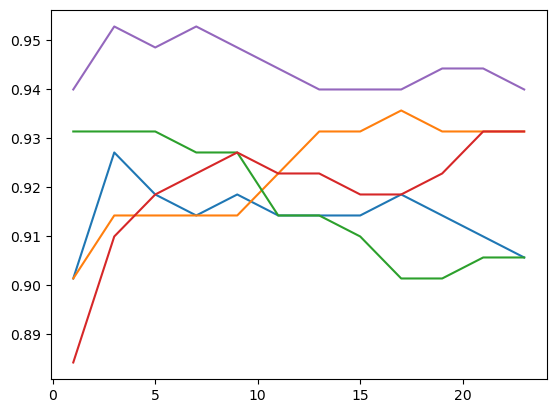

In [161]:
xpoints = np.array(k_list_weighted)
ypoints = np.array(acc_list_weighted)

plt.plot(xpoints, ypoints)
plt.show()

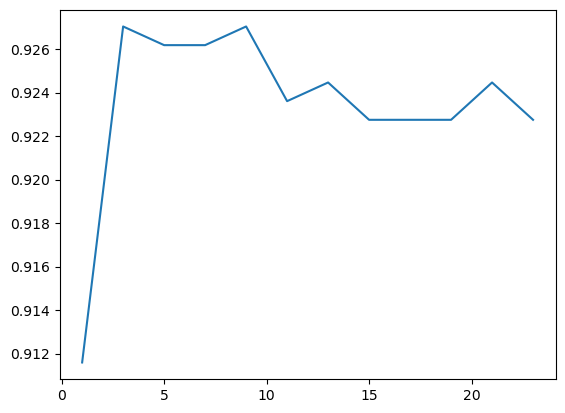

In [162]:
## Average accuracy for each value of k across cross validations
xpoints = np.array(k_list_weighted)
averaged_list_per_k_weighted = [np.average(i) for i in acc_list_weighted]
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [163]:
print(k_list_weighted)
print(averaged_list_per_k_weighted)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[0.9115879828326181, 0.9270386266094421, 0.9261802575107296, 0.9261802575107296, 0.9270386266094421, 0.9236051502145923, 0.9244635193133048, 0.9227467811158798, 0.9227467811158798, 0.9227467811158799, 0.9244635193133046, 0.9227467811158798]


In [164]:
## Best accuracy at k = 5
knn_model_weighted = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
score_knn_k_weighted = cross_val_score(knn_model, X_scaled, y, cv=5)
print(score_knn_k_weighted)

[0.92274678 0.91416309 0.93562232 0.91845494 0.94849785]


In [165]:
knn_weighted_avg_acc = np.average(score_knn_k_weighted)
print(knn_weighted_avg_acc*100)

92.78969957081544


In [166]:
knn_model_weighted.fit(X_scaled, y)

KNeighborsClassifier(weights='distance')

In [167]:
knn_model_weighted.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [168]:
## Therefore best performance is shown by using 3 neighbours.

In [169]:

print(np.average(score)*100)

92.1030042918455


In [170]:
## Using Logistic regression

# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression
LR_object = LogisticRegression(random_state=42)
scores = cross_val_score(LR_object, X_scaled, y, cv=5)
print(scores)

[0.92274678 0.95708155 0.92703863 0.94420601 0.96137339]


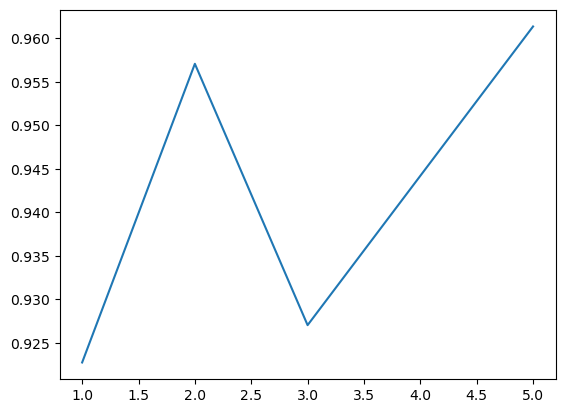

In [171]:
xpoints = np.array([1,2,3,4,5])
averaged_list_per_k_weighted = scores
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [172]:
LR_average_acc = np.average(score)
print("Logistic Regression model accuracy (in %):", LR_average_acc)

Logistic Regression model accuracy (in %): 0.9210300429184549


In [173]:
LR_object.fit(X_scaled, y)

LogisticRegression(random_state=42)

In [174]:
LR_object.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [175]:
## SVM

In [176]:
svm_object = svm.SVC(kernel='linear', C=1, random_state=42)
scores_svm = cross_val_score(svm_object, X_scaled, y, cv=5)
scores_svm

array([0.93133047, 0.96137339, 0.93991416, 0.94420601, 0.96566524])

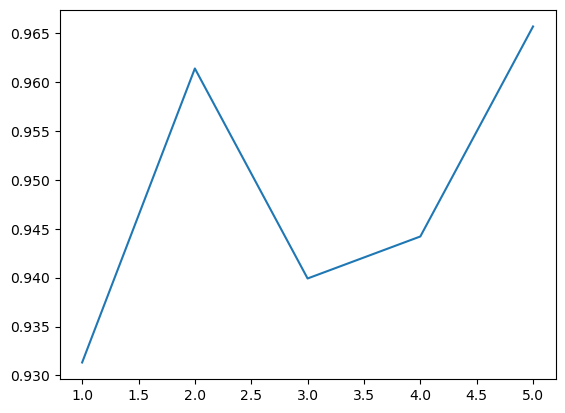

In [177]:
xpoints = np.array([1,2,3,4,5])
averaged_list_per_k_weighted = scores_svm
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [178]:
svm_avg_acc = np.average(scores_svm)
print("SVM model accuracy (in %):", svm_avg_acc*100)

SVM model accuracy (in %): 94.84978540772534


In [179]:
svm_object.fit(X_scaled, y)
svm_object.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [180]:
## Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier

RF_object = RandomForestClassifier(random_state=42)
scores_RF = cross_val_score(RF_object, X_scaled, y, cv=5)
print(scores_RF)

[0.97854077 0.96995708 0.96566524 0.96137339 0.93991416]


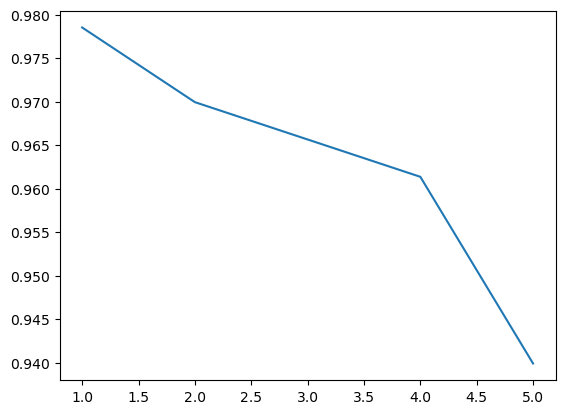

In [182]:
xpoints = np.array([1,2,3,4,5])
averaged_list_per_k_weighted = scores_RF
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [183]:
rf_avg_acc = np.average(scores_RF)
print("Random Forest model sccuracy is: ", rf_avg_acc*100)

Random Forest model sccuracy is:  96.30901287553648


In [184]:
## Comparison:
print("Following are the accuracies found across various models. \nAll accuracies have been calculated after 5 fold cross validation.\n")
print("KNN accuracy: ", knn_avg_acc)
print("Weighted KNN accuracy: ", knn_weighted_avg_acc)
print("Logistoc Regression accuracy: ", LR_average_acc)
print("SVM accuracy: ", svm_avg_acc)
print("Random Forest accuracy: ", rf_avg_acc)

Following are the accuracies found across various models. 
All accuracies have been calculated after 5 fold cross validation.

KNN accuracy:  0.9278969957081544
Weighted KNN accuracy:  0.9278969957081544
Logistoc Regression accuracy:  0.9210300429184549
SVM accuracy:  0.9484978540772533
Random Forest accuracy:  0.9630901287553648


In [185]:
results = {
    'Model' : ['KNN-3', 'Weighted-KNN-5', 'Logistic Regr.', 'SVM', 'Random Forest'],
    'Accuracies' : [knn_avg_acc*100, knn_weighted_avg_acc*100, LR_average_acc*100, svm_avg_acc*100, rf_avg_acc*100]
}

results_df = pd.DataFrame(results)
print(results_df)

            Model  Accuracies
0           KNN-3   92.789700
1  Weighted-KNN-5   92.789700
2  Logistic Regr.   92.103004
3             SVM   94.849785
4   Random Forest   96.309013


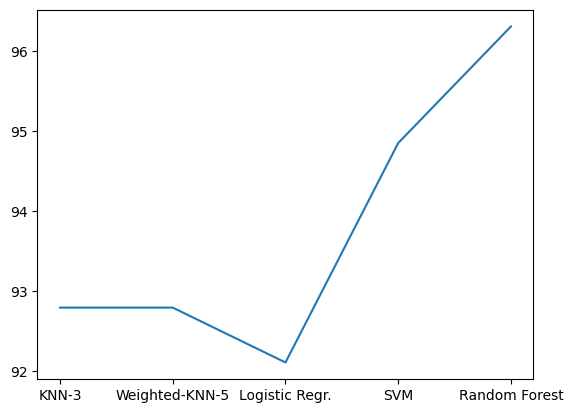

In [186]:
xpoints = results_df['Model']
ypoints = results_df['Accuracies']

plt.plot(xpoints, ypoints)
plt.show()